In [ ]:

# import the necessary packages that will be utilized
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pathlib
import seaborn as sns
import plotnine as gg
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# assign the desired file a variable using pathlib.Path command
input_file = pathlib.Path("../0.data-download/data/sample_info.csv")

# set the data frame to be the desired .csv file that is read by pandas(pd) using the pd.read_csv(desired file read as a previously defined variable)
df = pd.read_csv(input_file)

# assign the desired file a variable using pathlib.Path command
input_file2 = pathlib.Path("../0.data-download/data/CRISPR_gene_dependency.csv")

# set the data frame to be the desired .csv file that is read by pandas(pd) using the pd.read_csv(desired file read as a previously defined variable)
df2 = pd.read_csv(input_file2)

In [ ]:
# print the parameters of the read file
print(df.shape)
df.head(1)

In [ ]:
# print the parameters of the read file
print(df2.shape)
df2.head(1)

In [ ]:
90
%matplotlib inline

# sample_info.csv visualization
# how many samples from sample_info.csv?
n_samples = len(df["DepMap_ID"].unique())
print(f"Number of Samples Documented in sample_info.csv: {n_samples} \n")

# sample_info.csv visualization
# how many samples from CRISPR_gene_dependency.csv?
n_samples2 = len(df2["DepMap_ID"].unique())
print(f"Number of Samples Included in CRISPR_gene_dependency.csv: {n_samples2} \n")

# how many different ages were sampled from? 
all_ages = df["age"].unique()
print(f"Ages sampled from: \n {all_ages} \n")


# how many different types of cancer?
all_cancers = df["primary_disease"].unique()
print(f"All Cancer Types: \n {all_cancers} \n")

# create a bar chart that shows the number of types of cancer sampled 
data = df
g = (
    gg.ggplot(data, gg.aes(x="primary_disease")) + gg.geom_bar() + gg.theme(axis_text_x =element_text(angle = 90))
    )
print(g)

# identify which samples are included in both sample_info.csv and CRISPR_gene_dependency.csv
similar_samples = list(set(df["DepMap_ID"]) & set(df2["DepMap_ID"]))
#print(similar_samples)

# count the number of samples that overlap in both data sets 
sample_overlap = len(similar_samples)
print(f"number of sample overlaps between sample_info.csv and CRISPR_gene_dependency.csv: {sample_overlap} \n")

In [95]:
df_copy = df["age"]

df_copy = df_copy.convert_dtypes()

df_copy.loc[(df["age"] == " ")] = "N/A"



print(df_copy.info)

print(df_copy.head(5))




# if df_copy != "Adult" | "Pediatric" | "N/A" | "Fetus":






# if df_copy 
#     df_copy.convert_dtypes(int)
#     if df_copy >= 18 
        
# elif df_copy == "Pediatric":
#     nv = "Pediatric"
# elif (isinstance(df_copy, int)):
#     if(df_copy >= 18):
#         nv1 = "Adult"
# else:
#     nv2 = "Pediatric"



### or instead of 4 lines for the if/else...
# new_variable = "Adult" if df_copy >= 18 else "Pediatric"
# elif(bool(df_copy)): #I think this should check if the variable is empty of blank
# new_variable="NA" #or whatever
# else:
# print(df_copy) #just to see what makes it through the gauntlet of if/elifs

 


# str("Adult" | "Pediatric" | "Fetus" | "N/A")
# .loc[:, "age"][df_copy.age.isnull()] = str("N/A")



# df_copy.head(1)
# if df_copy.loc[:, "age"][df_copy.age] == str(""):
#     df_copy.loc[:, "age"][df_copy.age] = str("coolio")
# elif df_copy.loc[:, "age"].astype(int)[df_copy.age] >= 18:
#     df_copy.loc[:, "age"][df_copy.age] = str("Adult")
# else:
#     df_copy.loc[:, "age"][df_copy.age] = str("Pediatric")

    

<bound method Series.info of 0       <NA>
1         11
2         55
3         48
4       <NA>
        ... 
1835      42
1836    <NA>
1837       1
1838    <NA>
1839      71
Name: age, Length: 1840, dtype: string>
0    <NA>
1      11
2      55
3      48
4    <NA>
Name: age, dtype: string


In [96]:
# create a new data frame that will assign blank cells a value of 0

#ped_adult_count = df.loc[df["age"] ]


#ped_adult_count.loc[(df["age"] == "Adult")] = 18

#ped_adult_count.loc[(df["age"] == "Pediatric")] = 1

#ped_adult_count.loc[(df["age"] == "Fetus")] = -1


#age_col = df["age"]

#if age_col >= 18:
    #str("Adult")




#ped_adult_count_plot = (
  #  gg.ggplot(ped_adult_count, gg.aes(x="age")) + gg.geom_bar() + gg.theme(axis_text_x =element_text(angle = 90))
#)

#print(ped_adult_count_plot)

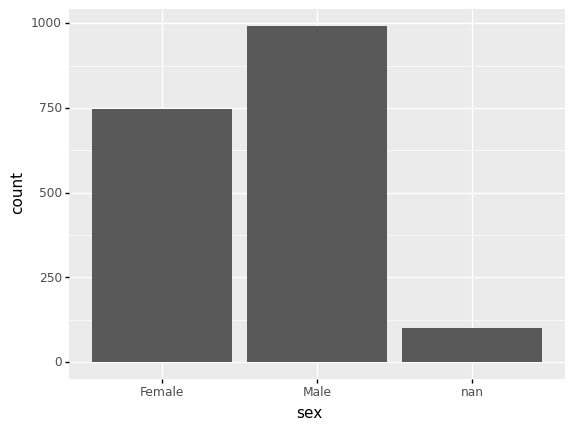

In [97]:
gendersamp = df
gendersamp_plot = (
    gg.ggplot(gendersamp, gg.aes(x="sex")) + gg.geom_bar() #+ gg.theme(axis_text_x =element_text(angle = 90))
)
print(gendersamp_plot)

In [98]:
# "Adult" was set to 18
# "Pediatric" was set to 0
# "Fetus" was set to 0

# create a new data frame that excludes blank cells in the data sets "Age" column
no_nan_age_df = df.loc[df["age"].notnull()]

# create a new data frame that will also assign the integer value of 18 to cells containing "Adult"
no_nan_age_df.loc[(df["age"] == "Adult")] = 18

# create a new data frame that will also assign the integer value of 0 to cells containing "Pediatric"
no_nan_age_df.loc[(df["age"] == "Pediatric")] = 0

# create a new data frame that will also assign the integer value of -1 to cells containg "Fetus"
no_nan_age_df.loc[(df["age"] == "Fetus")] = -1



adult_df = no_nan_age_df.loc[no_nan_age_df["age"].astype(int) >= 18]
adult_df = adult_df.astype({"age": int})
pediatric_df = no_nan_age_df.loc[(no_nan_age_df["age"].astype(int) < 18) & (no_nan_age_df["age"].astype(int) != -1)]
pediatric_df = pediatric_df.astype({"age": int})


<AxesSubplot:xlabel='age', ylabel='Count'>

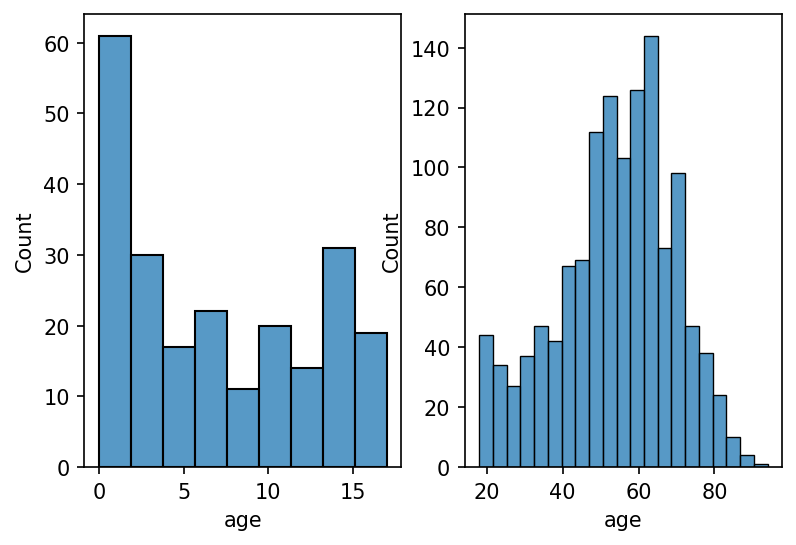

In [99]:
ig, axs = plt.subplots(1, 2, dpi=150)

# plot adult age distribution 
sns.histplot(x="age", data=adult_df, stat="count", ax=axs[1])

# plot pediatric age distribution
sns.histplot(x="age", data=pediatric_df, stat="count", ax=axs[0])

# visualizes the general distribution of ages sampled from